In [1]:
 from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [114]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.metrics import precision_score, recall_score, f1_score

In [115]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import seaborn as sns
from keras.layers import Input, Dense
from keras.models import Model, Sequential
from keras import regularizers


In [116]:
# load data
dataframe = pd.read_csv('/content/drive/MyDrive/Thub_netlist.csv', sep = r',',skipinitialspace=True)

/tmp/ipython-input-4002907640.py:2: DtypeWarning: Columns (0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48) have mixed types. Specify dtype option on import or set low_memory=False.
  dataframe = pd.read_csv('/content/drive/MyDrive/Thub_netlist.csv', sep = r',',skipinitialspace=True)


In [117]:
#dataframe

In [118]:
dataframe=dataframe.dropna(axis=1,how="any")
#dataframe=dataframe.drop(columns=['50'])
#dataframe.astype(float)
dataframe.fillna('mean', inplace=True)
dataframe = dataframe.dropna()
dataframe = dataframe.replace("'Trojan Infected'",1)
dataframe = dataframe.replace("'Trojan Free'",0)
#dataframe=dataframe.drop(columns=['50'])

In [119]:
dataframe

,0,1,2,3,4,5,6,7,8,9,...,41,42,43,44,45,46,47,48,49,50
0,Number of ports,Number of nets,Number of cells,Number of combinational cells,Number of sequential cells,Number of macros/black boxes,Number of buf/inv,Number of references,Combinational area,Buf/Inv area,...,Combinational Internal Power,Combinational Switching Power,Combinational Leakage Power,Combinational Total Power,Total Internal Power,Total Switching Power,Total Leakage Power,Total Total Power,Label,Circuit
1,26623,198177,172368,164960,6850,0,19504,22,173046.832,10376.1281,...,18253,32696,5135800,56082,45560,38947,5677500,90182,0,'AES'
2,27289,198776,172486,164991,6934,0,19504,2,173081.678,10376.1281,...,18260,32707,5136600,56101,45820,38963,5685000,90465,1,'AES-T100'
3,27545,198893,172468,164973,6934,0,19504,2,173066.25,10376.1281,...,18257,32707,5136200,56097,45851,38965,5685000,90498,1,'AES-T200'
4,28033,198562,172369,164960,6850,0,19504,1,173046.832,10376.1281,...,18250,32693,5135800,56076,45553,38942,5677500,90170,1,'AES-T300'
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
903,359,8376,6866,0,6866,0,0,27,0,0,...,0,726.6476,0,726.6476,0,726.6476,0,726.6476,1,'S35932-T615'
904,359,8373,6863,0,6863,0,0,26,0,0,...,0,726.4709,0,726.4709,0,726.4709,0,726.4709,1,'S35932-T616'
905,359,8374,6864,0,6864,0,0,26,0,0,...,0,726.5132,0,726.5132,0,726.5132,0,726.5132,1,'S35932-T617'
906,359,8378,6868,0,6868,0,0,25,0,0,...,0,726.6879,0,726.6879,0,726.6879,0,726.6879,1,'S35932-T618'


In [120]:
arr=np.array(dataframe.values)
#X=arr[0:,1:48]
#X=X.astype('float')
#Y=(arr[0:,49]).astype('float')


X=arr[1:,0:48]
X=X.astype('float')
Y=(arr[1:,47]).astype('float')

In [121]:
X.shape

(907, 48)

In [122]:
Y.shape

(907,)

In [123]:
#Y

In [124]:
#tsne_plot(X, Y)


In [125]:
# Scaling the data to make it suitable for the auto-encoder
X_scaled = MinMaxScaler().fit_transform(X)
X_normal_scaled = X_scaled[Y == 0]
X_fraud_scaled = X_scaled[Y == 1]


In [126]:
# Building the Input Layer
input_layer = Input(shape =(X.shape[1], ))

# Building the Encoder network
encoded = Dense(100, activation ='tanh',
				activity_regularizer = regularizers.l1(10e-5))(input_layer)
encoded = Dense(75, activation ='tanh',
				activity_regularizer = regularizers.l1(10e-5))(input_layer)
encoded = Dense(50, activation ='tanh',
				activity_regularizer = regularizers.l1(10e-5))(encoded)
encoded = Dense(25, activation ='tanh',
				activity_regularizer = regularizers.l1(10e-5))(encoded)
encoded = Dense(12, activation ='tanh',
				activity_regularizer = regularizers.l1(10e-5))(encoded)
encoded = Dense(6, activation ='tanh')(encoded)

# Building the Decoder network
decoded = Dense(12, activation ='tanh')(encoded)
decoded = Dense(25, activation ='tanh')(decoded)
decoded = Dense(50, activation ='tanh')(decoded)
decoded = Dense(100, activation ='tanh')(decoded)

# Building the Output Layer
output_layer = Dense(X.shape[1], activation ='relu')(decoded)


In [127]:
autoencoder.summary()

Model: "functional_13"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)      │ (None, 48)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (None, 75)             │         3,675 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 50)             │         3,800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_14 (Dense)                │ (None, 25)             │         1,275 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_15 (Dense)                │ (None, 12)             │           312 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_16 (Dense)                │ (None, 6)              │            78 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_17 (Dense)                │ (None, 12)             │            84 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_18 (Dense)                │ (None, 25)             │           325 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_19 (Dense)                │ (None, 50)             │         1,300 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_20 (Dense)                │ (None, 100)            │         5,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_21 (Dense)                │ (None, 48)             │         4,848 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 62,393 (243.73 KB)

 Trainable params: 20,797 (81.24 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 41,596 (162.49 KB)

In [128]:
import tensorflow as tf

In [130]:
# Defining the parameters of the Auto-encoder network
autoencoder = Model(input_layer, output_layer)
autoencoder.compile(optimizer =tf.keras.optimizers.Adam(learning_rate=0.001), loss ="binary_crossentropy")

# Training the Auto-encoder network
autoencoder.fit(X_normal_scaled, X_normal_scaled,
                                batch_size = 16, epochs = 50,
                                shuffle = True, validation_split = 0.20)

Epoch 1/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 9s 9s/step - loss: 0.5837 - val_loss: 0.2506
Epoch 2/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step - loss: 0.4621 - val_loss: 0.1745
Epoch 3/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step - loss: 0.3899 - val_loss: 0.1277
Epoch 4/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step - loss: 0.3736 - val_loss: 0.1203
Epoch 5/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step - loss: 0.3699 - val_loss: 0.1162
Epoch 6/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step - loss: 0.3645 - val_loss: 0.1119
Epoch 7/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step - loss: 0.3605 - val_loss: 0.1068
Epoch 8/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step - loss: 0.3429 - val_loss: 0.1047
Epoch 9/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step - loss: 0.3195 - val_loss: 0.1027
Epoch 10/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step - loss: 0.3146 - val_loss: 0.1003
Epoch 11/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step - loss: 0.3016 - val_loss: 0.0980
Epoch 12/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step - loss: 0.2975 - val_loss: 0.0960
Epo

In [131]:
autoencoder.summary()

Model: "functional_15"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_2 (InputLayer)      │ (None, 48)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_23 (Dense)                │ (None, 75)             │         3,675 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_24 (Dense)                │ (None, 50)             │         3,800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_25 (Dense)                │ (None, 25)             │         1,275 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_26 (Dense)                │ (None, 12)             │           312 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_27 (Dense)                │ (None, 6)              │            78 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_28 (Dense)                │ (None, 12)             │            84 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_29 (Dense)                │ (None, 25)             │           325 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_30 (Dense)                │ (None, 50)             │         1,300 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_31 (Dense)                │ (None, 100)            │         5,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_32 (Dense)                │ (None, 48)             │         4,848 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 62,393 (243.73 KB)

 Trainable params: 20,797 (81.24 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 41,596 (162.49 KB)

In [74]:
import sys

# Calculate the total size of the model in bytes
model_size_bytes = sum(sys.getsizeof(w) for w in autoencoder.get_weights())

# Convert bytes to megabytes
model_size_mb = model_size_bytes / (1024 * 1024)

print(f"Autoencoder model size: {model_size_mb:.2f} MB")

Autoencoder model size: 0.08 MB


In [132]:
hidden_representation = Sequential()
hidden_representation.add(autoencoder.layers[0])
hidden_representation.add(autoencoder.layers[1])
hidden_representation.add(autoencoder.layers[2])
hidden_representation.add(autoencoder.layers[3])
hidden_representation.add(autoencoder.layers[4])


In [133]:
# Separating the points encoded by the Auto-encoder as normal and fraud
normal_hidden_rep = hidden_representation.predict(X_normal_scaled)
fraud_hidden_rep = hidden_representation.predict(X_fraud_scaled)

# Combining the encoded points into a single table
encoded_X = np.append(normal_hidden_rep, fraud_hidden_rep, axis = 0)
y_normal = np.zeros(normal_hidden_rep.shape[0])
y_fraud = np.ones(fraud_hidden_rep.shape[0])
encoded_y = np.append(y_normal, y_fraud)

# Plotting the encoded points
#tsne_plot(encoded_X, encoded_y)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 247ms/step
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step


In [134]:
# Splitting the encoded data for linear classification
X_train_encoded, X_test_encoded, y_train_encoded, y_test_encoded = train_test_split(encoded_X, encoded_y, test_size = 0.2)

# Splitting the original data for non-linear classification
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2)


In [135]:
X_train_encoded.shape

(725, 12)

In [79]:
X_train_encoded

array([[-0.22522114,  0.10345722,  0.08499611, ..., -0.15109153,
         0.14583765,  0.49072775],
       [-0.18476447,  0.05337964,  0.10518146, ..., -0.02931607,
         0.11444549,  0.37353358],
       [-0.18476452,  0.05335915,  0.10518818, ..., -0.02931993,
         0.11443346,  0.373529  ],
       ...,
       [-0.24006036,  0.25236535,  0.01067396, ..., -0.17344554,
         0.19337218,  0.54160553],
       [-0.21911663,  0.20423232,  0.02791831, ..., -0.11315993,
         0.1677187 ,  0.48203498],
       [-0.1956668 ,  0.04817782,  0.10819487, ..., -0.06442133,
         0.11389753,  0.40297812]], dtype=float32)

In [80]:
X_test_encoded.shape

(182, 12)

In [81]:
X_train.shape

(725, 48)

In [136]:
Y_train = Y_train.astype(np.int32)
X_train = X_train.astype(np.int32)
Y_test = Y_test.astype(np.int32)
X_test = X_test.astype(np.int32)

Logistic Regression

In [137]:
# Building the logistic regression model
lrclf = LogisticRegression()
lrclf.fit(X_train_encoded, y_train_encoded)

# Storing the predictions of the linear model
y_pred_lrclf = lrclf.predict(X_test_encoded)

# Evaluating the performance of the linear model
print('Accuracy : '+str(accuracy_score(y_test_encoded, y_pred_lrclf)))

print(classification_report(Y_test,y_pred_lrclf))




Accuracy : 0.9725274725274725
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         9
           1       0.95      1.00      0.97       173

    accuracy                           0.95       182
   macro avg       0.48      0.50      0.49       182
weighted avg       0.90      0.95      0.93       182



/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [84]:
import sys

# Calculate the total size of the model in bytes
model_size_bytes = sys.getsizeof(lrclf.coef_) + sys.getsizeof(lrclf.intercept_)

# Convert bytes to megabytes
model_size_mb = model_size_bytes / (1024 * 1024)

print(f"Logistic Regression model size: {model_size_mb:.2f} MB")


Logistic Regression model size: 0.00 MB


In [138]:
from sklearn.metrics import confusion_matrix
tn, fp, fn, tp = confusion_matrix(Y_test,y_pred_lrclf).ravel()

In [139]:
tp, tn, fp, fn

(np.int64(173), np.int64(0), np.int64(9), np.int64(0))

SVM

In [140]:
# Building the SVM model
svmclf = SVC()
svmclf.fit(X_train, Y_train)

# Storing the predictions of the non-linear model
y_pred_svmclf = svmclf.predict(X_test)

# Evaluating the performance of the non-linear model
print('Accuracy : '+str(accuracy_score(Y_test, y_pred_svmclf)))
print(classification_report(Y_test,y_pred_svmclf))


Accuracy : 0.9505494505494505
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         9
           1       0.95      1.00      0.97       173

    accuracy                           0.95       182
   macro avg       0.48      0.50      0.49       182
weighted avg       0.90      0.95      0.93       182



/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


RANDOM FOREST

In [141]:
from sklearn.ensemble import RandomForestClassifier
import pandas as pd
lrclf = RandomForestClassifier(n_estimators =20)
lrclf.fit(X_train, Y_train)

# Storing the predictions of the linear model
y_pred_rfclf = lrclf.predict(X_test)

# Evaluating the performance of the linear model
print('Accuracy : '+str(accuracy_score(Y_test, y_pred_lrclf)))

print(classification_report(Y_test,y_pred_rfclf))

Accuracy : 0.9505494505494505
              precision    recall  f1-score   support

           0       1.00      0.22      0.36         9
           1       0.96      1.00      0.98       173

    accuracy                           0.96       182
   macro avg       0.98      0.61      0.67       182
weighted avg       0.96      0.96      0.95       182



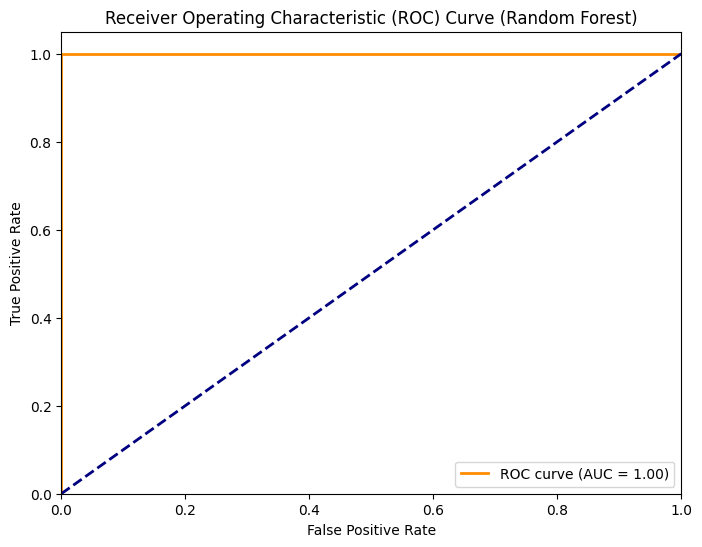

In [95]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Calculate ROC curve and AUC for the Random Forest model
fpr_rf, tpr_rf, thresholds_rf = roc_curve(Y_test, y_pred_rfclf)
roc_auc_rf = auc(fpr_rf, tpr_rf)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr_rf, tpr_rf, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc_rf:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve (Random Forest)')
plt.legend(loc="lower right")
plt.show()

In [96]:
# Print the confusion matrix for the Random Forest model
print(confusion_matrix(Y_test, y_pred_rfclf))

[[  5   0]
 [  0 177]]


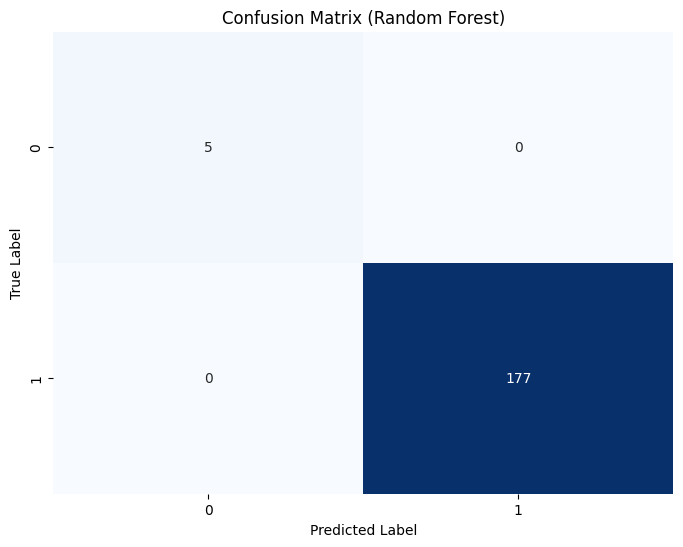

In [97]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Assuming Y_test and y_pred_rfclf are available from previous cells
cm_rf = confusion_matrix(Y_test, y_pred_rfclf)

plt.figure(figsize=(8, 6))
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix (Random Forest)')
plt.show()

In [98]:
import time
import sys

# Measure prediction time latency
start_time = time.time()
y_pred_rfclf = lrclf.predict(X_test) # Assuming lrclf is your Random Forest model
end_time = time.time()
prediction_latency = end_time - start_time
print(f"Random Forest prediction latency: {prediction_latency:.6f} seconds")

# Measure memory footprint in KB
# This is an approximation and might not capture all memory usage
model_size_bytes = sys.getsizeof(lrclf) + sum(sys.getsizeof(tree) for tree in lrclf.estimators_)
model_size_kb = model_size_bytes / 1024
print(f"Random Forest model memory footprint: {model_size_kb:.2f} KB")

Random Forest prediction latency: 0.004739 seconds
Random Forest model memory footprint: 0.98 KB


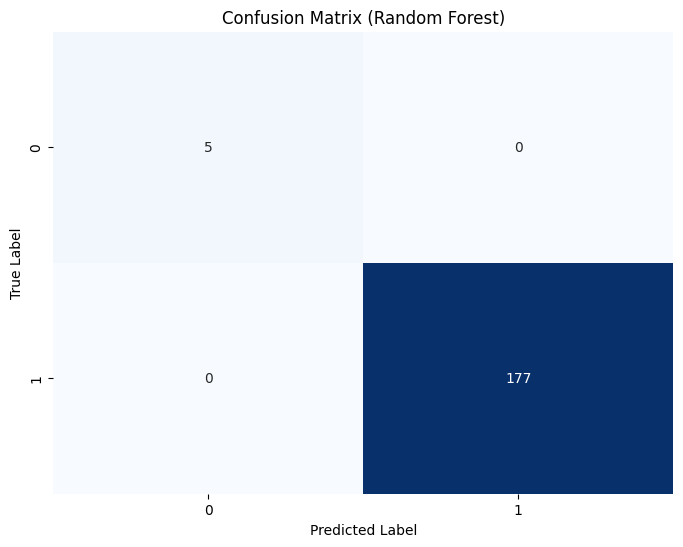

In [99]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Assuming you have calculated the confusion matrix and stored it in a variable named 'cm'
# If not, you can calculate it like this:
# cm = confusion_matrix(Y_test, Y_pred) # Replace Y_test and Y_pred with your actual test labels and predictions

# For example, let's use the confusion matrix from the last Random Forest model
cm = confusion_matrix(Y_test, y_pred_rfclf)


plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix (Random Forest)')
plt.show()

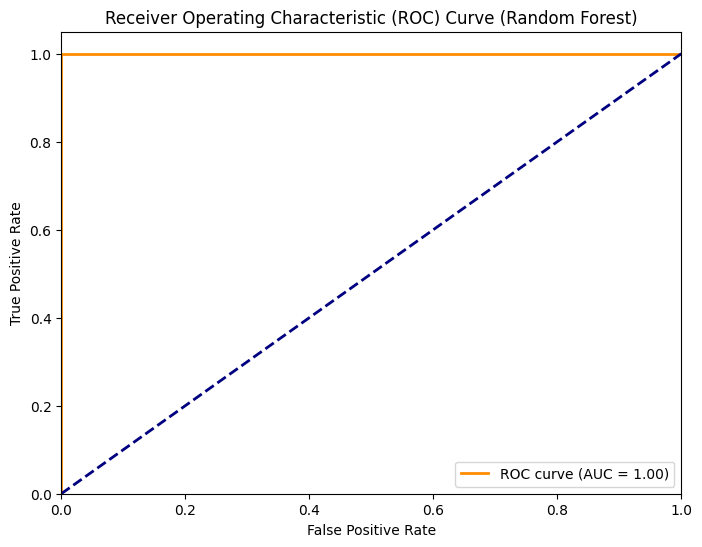

In [100]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Calculate ROC curve and AUC for the Random Forest model
fpr_rf, tpr_rf, thresholds_rf = roc_curve(Y_test, y_pred_rfclf)
roc_auc_rf = auc(fpr_rf, tpr_rf)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr_rf, tpr_rf, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc_rf:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve (Random Forest)')
plt.legend(loc="lower right")
plt.show()

KNN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

clf = KNeighborsClassifier(n_neighbors=3)

clf.fit(X_train, Y_train)

Y_pred = clf.predict(X_test)
print(confusion_matrix(Y_test,Y_pred))
print(classification_report(Y_test,Y_pred))

accuracy = 100 * accuracy_score(Y_test, Y_pred)

print(accuracy)

[[  0   8]
 [  0 174]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         8
           1       0.96      1.00      0.98       174

    accuracy                           0.96       182
   macro avg       0.48      0.50      0.49       182
weighted avg       0.91      0.96      0.93       182

95.6043956043956


/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


XGBOOST CLASSIFIER

In [ ]:
from xgboost import XGBClassifier

clf = XGBClassifier(n_estimators=10)

clf.fit(X_train, Y_train)


Y_pred = clf.predict(X_test)
print(confusion_matrix(Y_test,Y_pred))
print(classification_report(Y_test,Y_pred))

accuracy = 100 * accuracy_score(Y_test, Y_pred)

print(accuracy)

[[  5   3]
 [  0 174]]
              precision    recall  f1-score   support

           0       1.00      0.62      0.77         8
           1       0.98      1.00      0.99       174

    accuracy                           0.98       182
   macro avg       0.99      0.81      0.88       182
weighted avg       0.98      0.98      0.98       182

98.35164835164835


DECISION TREE CLASSIFIER

In [ ]:
from sklearn.tree import DecisionTreeClassifier

clf = DecisionTreeClassifier()

clf = clf.fit(X_train, Y_train)

Y_pred = clf.predict(X_test)

#print(confusion_matrix((y_test_encoded,Y_pred))
print(classification_report(Y_test,Y_pred))
Accuracy= 100 * accuracy_score(Y_test, Y_pred)
print(Accuracy)


              precision    recall  f1-score   support

           0       1.00      1.00      1.00         8
           1       1.00      1.00      1.00       174

    accuracy                           1.00       182
   macro avg       1.00      1.00      1.00       182
weighted avg       1.00      1.00      1.00       182

100.0


GAUSSIAN NAIVE BAYE'S

In [ ]:
from sklearn.naive_bayes import GaussianNB


# instantiate the model
gnb = GaussianNB()


# fit the model
gnb.fit(X_train, Y_train)

Y_pred = gnb.predict(X_test)
print(confusion_matrix(Y_test,Y_pred))
print(classification_report(Y_test,Y_pred))
accuracy = 100 * (accuracy_score(Y_test, Y_pred))
print(accuracy)

[[  0   8]
 [  8 166]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         8
           1       0.95      0.95      0.95       174

    accuracy                           0.91       182
   macro avg       0.48      0.48      0.48       182
weighted avg       0.91      0.91      0.91       182

91.20879120879121


In [ ]:
# prompt: MAKE ENSEMBLE MODEL WITH 4 BEST MODEL

from sklearn.ensemble import VotingClassifier

# Assuming you have your best models as:
# lrclf (Logistic Regression)
# svmclf (SVM)
# clf (Random Forest) - this might need renaming for clarity
# clf (XGBoost) - this also might need renaming for clarity

# Create a list of your best models
estimators = [
    ('logistic_regression', lrclf),
    ('svm', svmclf),
    ('random_forest', lrclf),  # Replace with the actual variable name if different
   # ('xgboost', clf)  # Replace with the actual variable name if different
]

# Create the ensemble model using VotingClassifier
ensemble_model = VotingClassifier(estimators=estimators, voting='hard')  # 'hard' for majority vote

# Train the ensemble model
ensemble_model.fit(X_train, Y_train)

# Make predictions with the ensemble model
Y_pred_ensemble = ensemble_model.predict(X_test)

# Evaluate the performance of the ensemble model
print(confusion_matrix(Y_test, Y_pred_ensemble))
print(classification_report(Y_test, Y_pred_ensemble))

accuracy = 100 * accuracy_score(Y_test, Y_pred_ensemble)
accuracy


[[  5   3]
 [  0 174]]
              precision    recall  f1-score   support

           0       1.00      0.62      0.77         8
           1       0.98      1.00      0.99       174

    accuracy                           0.98       182
   macro avg       0.99      0.81      0.88       182
weighted avg       0.98      0.98      0.98       182



98.35164835164835

In [ ]:
# prompt: make ensemble model with best  4 models

from sklearn.ensemble import VotingClassifier

# Assuming you have trained the following models and stored their predictions
# lrclf (Logistic Regression)
# svmclf (SVM)
# clf (KNN)
# clf (XGBoost)


# Create a voting classifier with the best 4 models
ensemble_clf = VotingClassifier(estimators=[
    ('lr', lrclf),
    ('svm', svmclf),
    ('random_forest', lrclf),  # Assuming KNN is the 'clf' from your code
    ('xgb', XGBClassifier(n_estimators=10)) # Assuming XGBoost is the 'clf' from your code
], voting='hard')  # 'hard' for majority voting, 'soft' for weighted average probabilities

# Fit the ensemble model on the training data
ensemble_clf.fit(X_train, Y_train)

# Make predictions with the ensemble model
Y_pred_ensemble = ensemble_clf.predict(X_test)

# Evaluate the ensemble model
print(confusion_matrix(Y_test, Y_pred_ensemble))
print(classification_report(Y_test, Y_pred_ensemble))
accuracy = 100 * accuracy_score(Y_test, Y_pred_ensemble)
print("Ensemble Accuracy:", accuracy)


[[  5   3]
 [  0 174]]
              precision    recall  f1-score   support

           0       1.00      0.62      0.77         8
           1       0.98      1.00      0.99       174

    accuracy                           0.98       182
   macro avg       0.99      0.81      0.88       182
weighted avg       0.98      0.98      0.98       182

Ensemble Accuracy: 98.35164835164835


In [110]:
from sklearn.ensemble import VotingClassifier

# Assuming you have trained the following models:
# lrclf (Logistic Regression)
# svmclf (SVM)
# lrclf (Random Forest) - Renaming to rfclf for clarity

# Create a voting classifier with the specified models
ensemble_clf_selected = VotingClassifier(estimators=[
    ('lr', lrclf),
    ('svm', svmclf),
    ('rf', RandomForestClassifier(n_estimators=30)) # Using a new instance for clarity
], voting='hard')  # 'hard' for majority voting, 'soft' for weighted average probabilities

# Fit the ensemble model on the training data
ensemble_clf_selected.fit(X_train, Y_train)

# Make predictions with the ensemble model
Y_pred_ensemble_selected = ensemble_clf_selected.predict(X_test)

# Evaluate the ensemble model
print("Confusion Matrix (Ensemble - LR, SVM, RF):")
print(confusion_matrix(Y_test, Y_pred_ensemble_selected))
print("\nClassification Report (Ensemble - LR, SVM, RF):")
print(classification_report(Y_test, Y_pred_ensemble_selected))
accuracy_ensemble_selected = 100 * accuracy_score(Y_test, Y_pred_ensemble_selected)
print("\nEnsemble Accuracy (Ensemble - LR, SVM, RF):", accuracy_ensemble_selected)

Confusion Matrix (Ensemble - LR, SVM, RF):
[[  0   4]
 [  0 178]]

Classification Report (Ensemble - LR, SVM, RF):
              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00         4
         1.0       0.98      1.00      0.99       178

    accuracy                           0.98       182
   macro avg       0.49      0.50      0.49       182
weighted avg       0.96      0.98      0.97       182


Ensemble Accuracy (Ensemble - LR, SVM, RF): 97.8021978021978


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no pre

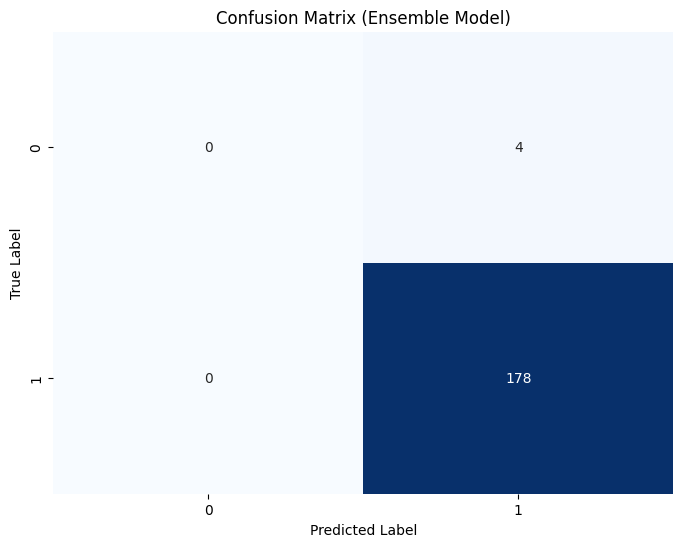

In [111]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Assuming Y_test and Y_pred_ensemble_selected are available from the previous cell
cm_ensemble = confusion_matrix(Y_test, Y_pred_ensemble_selected)

plt.figure(figsize=(8, 6))
sns.heatmap(cm_ensemble, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix (Ensemble Model)')
plt.show()

In [112]:
import sys

# Measure memory footprint of the ensemble model in KB
# This is an approximation and might not capture all memory usage
ensemble_model_size_bytes = sys.getsizeof(ensemble_clf_selected)

# Add the size of the individual estimators within the VotingClassifier
# Use named_estimators_ after fitting to access the fitted estimators
for name, estimator in ensemble_clf_selected.named_estimators_.items():
    if hasattr(estimator, 'get_params'): # Check if it's a scikit-learn estimator
        ensemble_model_size_bytes += sys.getsizeof(estimator)
        if hasattr(estimator, 'estimators_'): # For ensemble methods like RandomForest
             ensemble_model_size_bytes += sum(sys.getsizeof(e) for e in estimator.estimators_)

ensemble_model_size_kb = ensemble_model_size_bytes / 1024
print(f"Ensemble model memory footprint: {ensemble_model_size_kb:.2f} KB")

Ensemble model memory footprint: 1.59 KB


In [ ]:
import time
import sys

# Measure prediction time latency for the ensemble model
start_time_ensemble = time.time()
y_pred_ensemble_selected = ensemble_clf_selected.predict(X_test)
end_time_ensemble = time.time()
prediction_latency_ensemble = end_time_ensemble - start_time_ensemble
print(f"Ensemble model prediction latency: {prediction_latency_ensemble:.6f} seconds")

# Measure memory footprint of the ensemble model in KB
# This is an approximation and might not capture all memory usage
ensemble_model_size_bytes = sys.getsizeof(ensemble_clf_selected)
# Add the size of the individual estimators within the VotingClassifier
for estimator_name, estimator in ensemble_clf_selected.estimators_:
    if hasattr(estimator, 'get_params'): # Check if it's a scikit-learn estimator
        ensemble_model_size_bytes += sys.getsizeof(estimator)
        if hasattr(estimator, 'estimators_'): # For ensemble methods like RandomForest
             ensemble_model_size_bytes += sum(sys.getsizeof(e) for e in estimator.estimators_)


ensemble_model_size_kb = ensemble_model_size_bytes / 1024
print(f"Ensemble model memory footprint: {ensemble_model_size_kb:.2f} KB")

Ensemble model prediction latency: 0.010937 seconds


ValueError: too many values to unpack (expected 2)

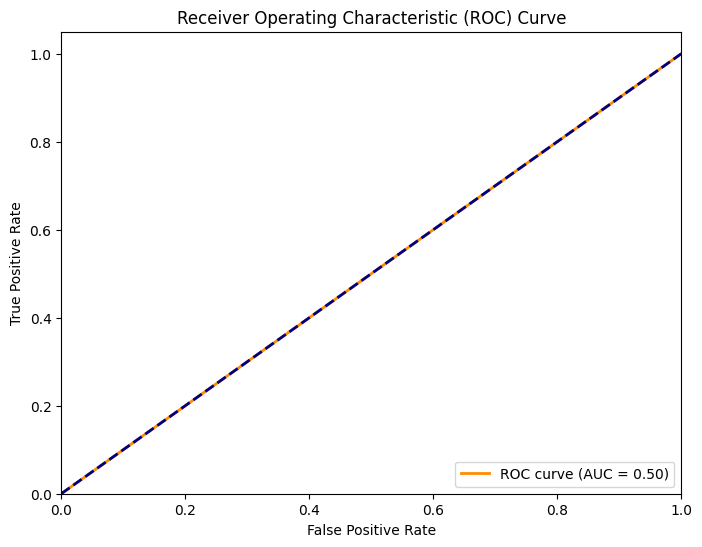

In [113]:
from sklearn.metrics import roc_curve, auc

# Calculate ROC curve and AUC for the ensemble model
fpr, tpr, thresholds = roc_curve(Y_test, Y_pred_ensemble_selected)
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()